In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 변수 설명
##### 1. groupId - 일치하는 그룹을 식별하기 위한 ID(interger). 동일 팀이어도, 다른 경기에선 매번 다른 ID를 가짐.
##### 2. matchId - 매치(경기)를 식별하기 위한 경기ID
##### 3. assists - 해당 플레이어가 얼마나 어시스트를 했는지. 데미지 관련하여서
##### 4. boosts - 부스트아이템 사용횟수
##### 5. damageDealt - 총 피해입힌 수. 자체 피해는 제외됨
##### 6. DBNOs - 마주친 적의 수
##### 7. headshotKills - 헤드샷 횟수
##### 8. heals - 힐템 사용횟수
##### 9. killPlace - 처치한 적플레이어 수의 순위
##### 10. killPoints - 킬포인트. 외부 랭킹에 따라 매겨짐. 킬수만을 중요하게 보는 랭킹.
##### 11. kills - 죽인 적 플레이어 수
##### 12. killStreaks - 짧은 시간에 최대 로 죽인 수
##### 13. longestKill - 가장 멀리서 죽인 거리. 운전을 하게되면 변수가 생길 수 있음
##### 14. maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.(???)
##### 15. numGroups - 데이터에 들어있는 그룹의 수
##### 16. revives - 부활시킨 팀원의 수.
##### 17. rideDistance - 차량의 총 이동거리(m)
##### 18. roadKills - 로드킬 수(차량으로 치어죽인 것)
##### 19. swimDistance - 총 수영한 거리(m)
##### 20. teamKills - 팀킬한 횟수
##### 21. vehicleDestroys - 차량 폭파 횟수
##### 22. walkDistance - 발로 뛰어다는 거리(m)
##### 23. weaponsAcquired - 파밍한 무기의 수
##### 24. winPoints - 승리만을 보는 랭킹 포인트. 외부 랭킹을 가져온 것.
##### 25. winPlacePerc - 우승 예측하는 것. 1~0사이의 값을 가진다. numGroup이 아닌 maxPlace에서 계산되기 때문에 누락된 청크(정보조각)가 있을 수 있다.

In [2]:
train = pd.read_csv('D:/school/5_1/MediaProject/kaggle battle ground/new/input/train_V2.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [4]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


## Kill에 대해 탐구해보자

In [8]:
print("The average person kills {:.4f} players, 99% of people have {} kills or less, while the most kills ever recorded is {}.".format(train['kills'].mean(),train['kills'].quantile(0.99), train['kills'].max()))

The average person kills 0.9248 players, 99% of people have 7.0 kills or less, while the most kills ever recorded is 72.


In [10]:
print("플레이어의 평균 킬수는 {:.4f}이다. 그리고 99% 의 플레이어는 {} 이하의 킬수를 기록한다. 가장 높은 킬수는 {}.".format(train['kills'].mean(),train['kills'].quantile(0.99), train['kills'].max()))

플레이어의 평균 킬수는 0.9248이다. 그리고 99% 의 플레이어는 7.0 이하의 킬수를 기록한다. 가장 높은 킬수는 72.


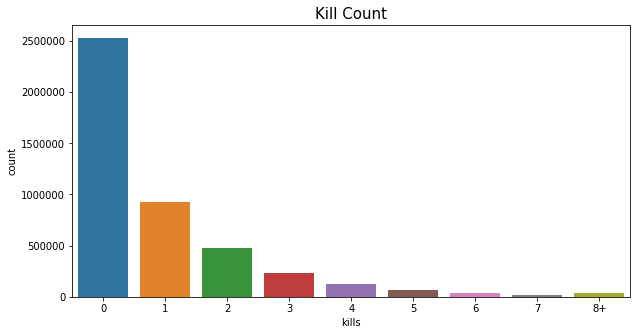

In [14]:
"""kill count를 시각화 해보자"""
data = train.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'#.quantile(0.99)는 백분위수 구하기. 즉 정제과정
plt.figure(figsize=(10,5))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title("Kill Count",fontsize=15)
plt.show()

In [17]:
"""특이한거 찾아보기"""
print("{}명({:.4f}%)의 플레이어는 킬을 한번도 안하고 승리함. 개꿀임"
      .format(len(data[data['winPlacePerc']==1]),100*len(data[data['winPlacePerc']==1])/len(train)))

data1 = train[train['damageDealt'] == 0].copy()
print("{}명({:.4f}%)의 플레이어는 적에게 데미지를 하나도 안주고 승리함. 총을 한발도 안쐈다고 보면 됨,"
      .format(len(data1[data1['winPlacePerc']==1]), 100*len(data1[data1['winPlacePerc']==1])/len(train)))
"""어떻게 해석해 볼까. 아마 첫번째는 전략적으로 조금 생각을 하는 플레이어라고 보면 됨. 
두번째는 어느정도 전략적이지만 운이 정말 좋은 케이스임"""

114089명(2.5655%)의 플레이어는 킬을 한번도 안하고 승리함. 개꿀임
4770명(0.1073%)의 플레이어는 적에게 데미지를 하나도 안주고 승리함. 총을 한발도 안쐈다고 보면 됨,


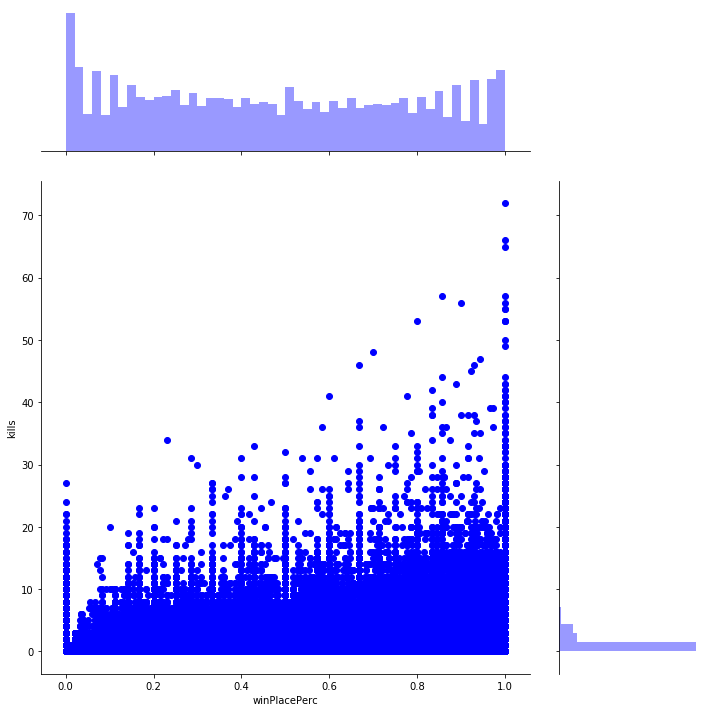

In [18]:
"""승률 예측과 킬수의 그래프를 그려보았다."""
sns.jointplot(x="winPlacePerc", y="kills", data=train, height=10, ratio=3, color="b")
plt.show()
"""여기서 볼수 있는건 킬수와 승률은 상관관계가 있다는 것이다."""

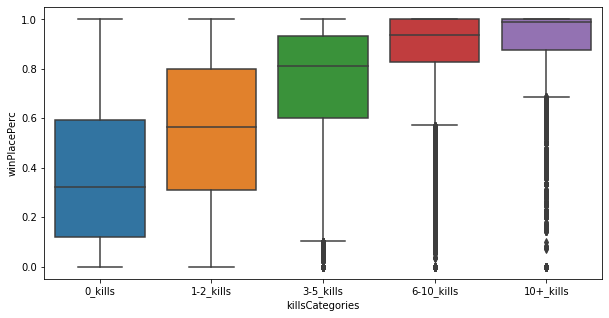

In [20]:
"""위에서 살펴본 킬수와 승률의 관계를 좀 더 잘 보이게 해보자.
킬수를 범주로 묶어서 보면 편할테니 그렇게 바꿔보았다."""
kills = train.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], 
                                  labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])
# 킬수를 카테고리화 하였다. 범주로 바꾸어 묶음
plt.figure(figsize=(10,5))
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.show()
"""이렇게 보면 상관관계가 더욱 명확하게 보인다."""

## 뛰는 건 어떨까

In [22]:
print("플레이어는 평균 {:.1f}m를 뛴다. 99%의 플레이어가 {}m 이하로 뛰지만, 제일 많이 뛴 플레이어는 for {}m를 뛰었다."
      .format(train['walkDistance'].mean(), train['walkDistance'].quantile(0.99), train['walkDistance'].max()))

플레이어는 평균 1154.2m를 뛴다. 99%의 플레이어가 4396.0m 이하로 뛰지만, 제일 많이 뛴 플레이어는 for 25780.0m를 뛰었다


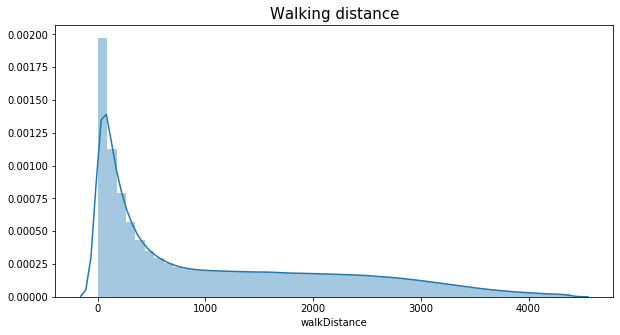

In [25]:
"""이제 이것도 그래프로 나타내보자"""
data = train.copy()
data = data[data['walkDistance'] < train['walkDistance'].quantile(0.99)]
plt.figure(figsize=(10,5))
plt.title("Walking distance", fontsize=15)
sns.distplot(data['walkDistance'])
plt.show()

In [28]:
print("{}명({:.4f}%)은 0m를 뛰었다. 아마 낙하하면서 죽었거나, 게임을 시작하고 안한 사람(게임용어 마네킹)일 것이다. 게임할 때 항상 마네킹이 2~3명 있었던것을 감안하면 이정도 수치가 맞다."
      .format(len(data[data['walkDistance'] == 0]), 100*len(data1[data1['walkDistance']==0])/len(train)))

99603명(2.0329%)은 0m를 뛰었다. 아마 낙하하면서 죽었거나, 게임을 시작하고 안한 사람(게임용어 마네킹)일 것이다. 게임할 때 항상 마네킹이 2~3명 있었던것을 감안하면 이정도 수치가 맞다.


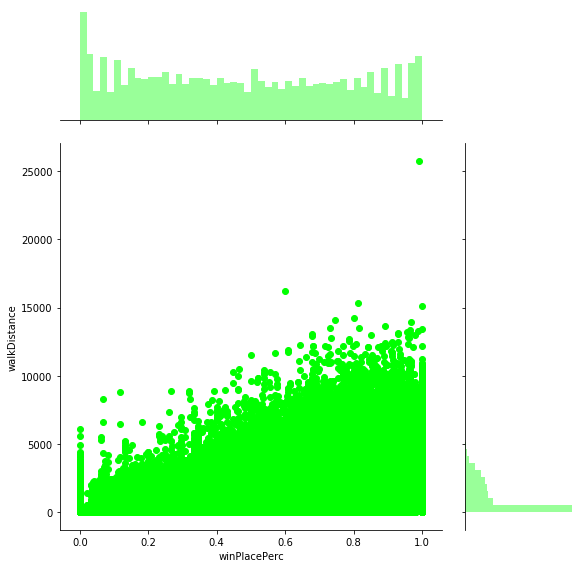

In [30]:
"""이제 승률이랑 뛴거리랑 비교해보자"""
sns.jointplot(x="winPlacePerc", y="walkDistance",  data=train, height=10, ratio=3, color="lime")
plt.show()
"""당연히 뛴 거리랑 승률이랑 비슷하겠지? 오래살면 그만큼 많이 뛸테니까"""

## 이제 운전

In [32]:
print("플레이어는 평균적으로 {:.1f}m를 운전한다. 99%의 플레이어는 {}m 이하로 운전하지만, 제일 운전을 많이한 사람은 {}m를 운전했다."
      .format(train['rideDistance'].mean(), train['rideDistance'].quantile(0.99), train['rideDistance'].max()))

플레이어는 평균적으로 606.1m를 운전한다. 99%의 플레이어는 6966.0m 이하로 운전하지만, 제일 운전을 많이한 사람은 40710.0m를 운전했다.


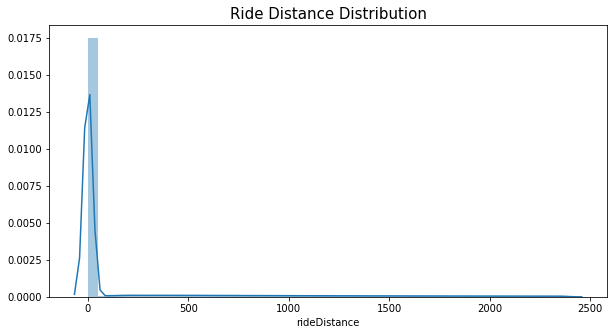

In [33]:
"""그래프 그려보자"""
data = train.copy()
data = data[data['rideDistance'] < train['rideDistance'].quantile(0.9)]
plt.figure(figsize=(10,5))
plt.title("Ride Distance Distribution",fontsize=15)
sns.distplot(data['rideDistance'])
plt.show()

In [34]:
print("{}명({:.4f}%)의 플레이어가 운전을 아예 안했다. 운전이랑 승률이랑 상관관계가 약하지 않을까?"
      .format(len(data[data['rideDistance'] == 0]), 100*len(data1[data1['rideDistance']==0])/len(train)))

3309429명(23.1022%)의 플레이어가 운전을 아예 안했다. 운전이랑 승률이랑 상관관계가 약하지 않을까?


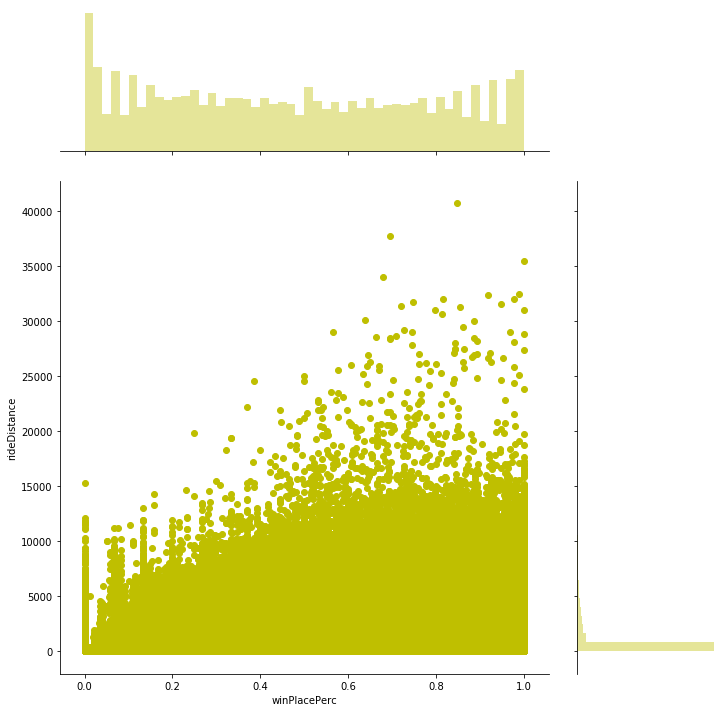

In [35]:
"""그래서 그래프로 보았음"""
sns.jointplot(x="winPlacePerc", y="rideDistance", data=train, height=10, ratio=3, color="y")
plt.show()
"""근데 상관관계가 보인다"""

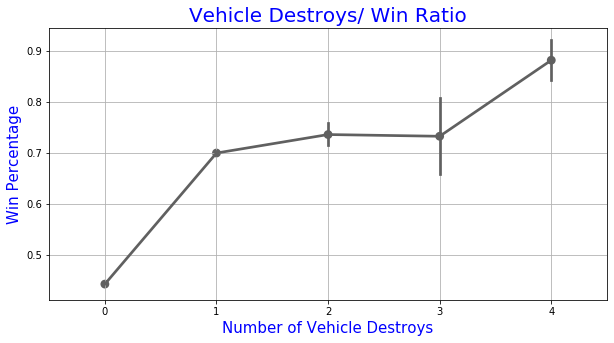

'역시 승률이랑 상관관계가 있구만'

In [38]:
"""근데 차량관련해서 살펴봐야 할 것이 하나 있는데, 차량을 폭파시키는 건 게임좀 할 줄 아는 놈이라는 뜻이지
그래서 이것도 한번 보자. 근데 pointplot으로 해봤음"""
f,ax1 = plt.subplots(figsize =(10,5))
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=data,color='#606060',alpha=0.8)
plt.xlabel('Number of Vehicle Destroys',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Vehicle Destroys/ Win Ratio',fontsize = 20,color='blue')
plt.grid()
plt.show()
"""역시 승률이랑 상관관계가 있구만"""

## 수영하는 것도 중요하지. 한번 보자

In [39]:
print("플레이어 평균 수영거리는 {:.1f}m이다. 99%의 플레이어는 {}m이하로 수영한다. {}m가 플레이어 중 제일 많이 헤엄친 거리이다."
      .format(train['swimDistance'].mean(), train['swimDistance'].quantile(0.99), train['swimDistance'].max()))

플레이어 평균 수영거리는 4.5m이다. 99%의 플레이어는 123.0m이하로 수영한다. 3823.0m가 플레이어 중 제일 많이 헤엄친 거리이다.


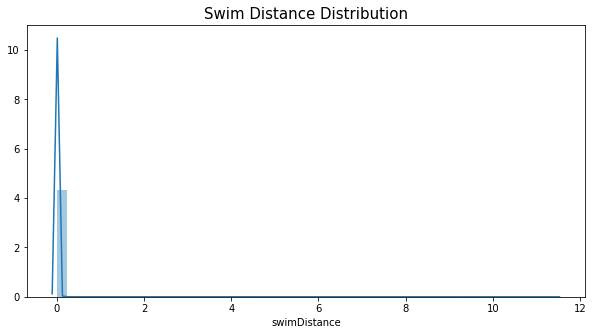

In [40]:
data = train.copy()
data = data[data['swimDistance'] < train['swimDistance'].quantile(0.95)]
plt.figure(figsize=(10,5))
plt.title("Swim Distance Distribution",fontsize=15)
sns.distplot(data['swimDistance'])
plt.show()

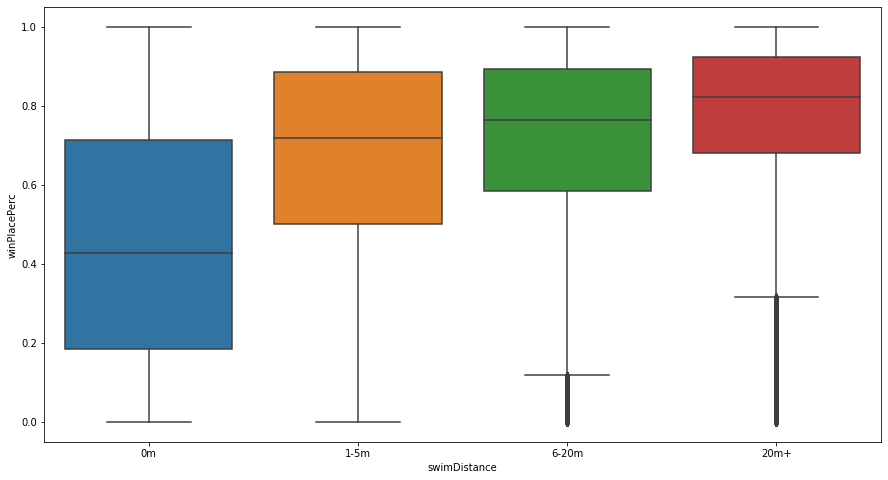

In [41]:
swim = train.copy()

swim['swimDistance'] = pd.cut(swim['swimDistance'], [-1, 0, 5, 20, 5286], labels=['0m','1-5m', '6-20m', '20m+'])

plt.figure(figsize=(15,8))
sns.boxplot(x="swimDistance", y="winPlacePerc", data=swim)
plt.show()

## 치료량 봅시다

In [7]:
print("힐 아이템은 평균적으로 한 사람 당 {:.1f}개를 사용한다. 99%의 사람들은 {}개 이하로 사용하지만, 가장 많은 사람은 {}개를 사용하였다."
     .format(train['heals'].mean(), train['heals'].quantile(0.99), train['heals'].max()))
print("부스트 아이템은 평균적으로 한 사람당 {:.1f}개를 사용한다. 99%의 사람들은 {}개 이하로 사용하지만, 가장 많이 사용한 사람은 {}개를 사용하였다."
     .format(train['boosts'].mean(), train['boosts'].quantile(0.99), train['boosts'].max()))

힐 아이템은 평균적으로 한 사람 당 1.4개를 사용한다. 99%의 사람들은 12.0개 이하로 사용하지만, 가장 많은 사람은 80개를 사용하였다.
부스트 아이템은 평균적으로 한 사람당 1.1개를 사용한다. 99%의 사람들은 7.0개 이하로 사용하지만, 가장 많이 사용한 사람은 33개를 사용하였다.


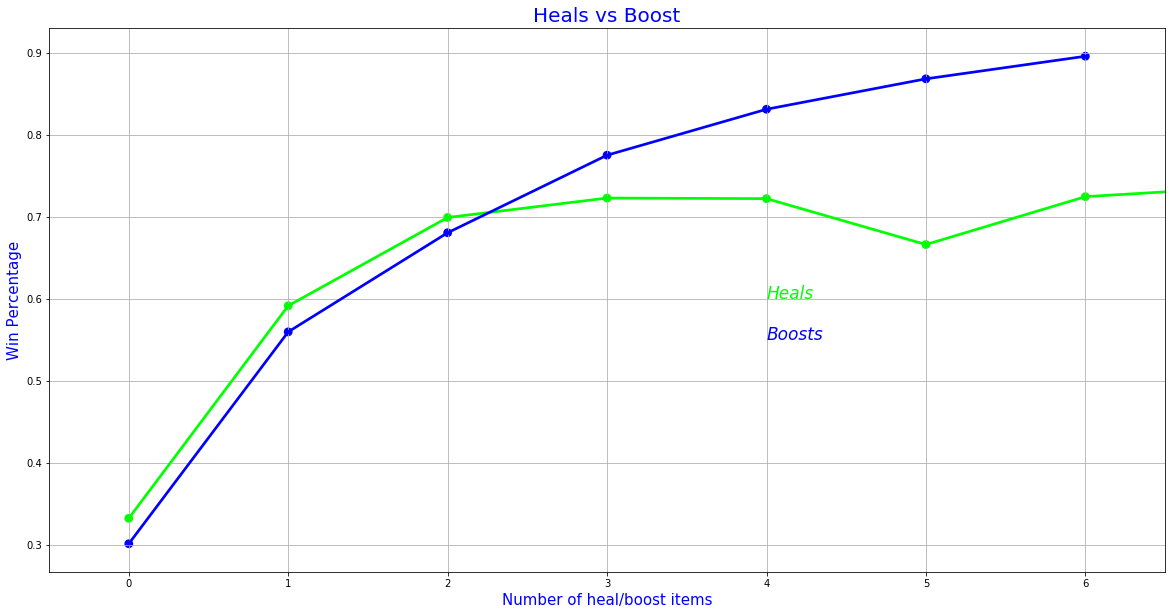

In [8]:
"""heals와 boosts는 한 그래프에 그려보자"""
data = train.copy()
data = data[data['heals'] < train['heals'].quantile(0.99)]
data = data[data['boosts'] < train['boosts'].quantile(0.99)]

f, ax1 = plt.subplots(figsize = (20, 10))
sns.pointplot(x = 'heals', y = 'winPlacePerc', data = data, color = 'lime', alpha = 0.8)
sns.pointplot(x = 'boosts', y = 'winPlacePerc', data = data, color = 'blue', alpha = 0.8)

plt.text(4, 0.6, 'Heals', color = 'lime', fontsize = 17, style = 'italic') #범례 표시
plt.text(4, 0.55, 'Boosts', color = 'blue', fontsize = 17, style = 'italic')

plt.xlabel('Number of heal/boost items', fontsize = 15, color = 'blue')
plt.ylabel('Win Percentage', fontsize = 15, color = 'blue')

plt.title('Heals vs Boost', fontsize = 20, color = 'blue')

plt.grid()
plt.show()

In [ ]:
sns.jointplot(x = "winPlacePerc", y = "heals", data = train, height = 10, ratio = 3, color = "lime")
plt.show()